In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from builtins import range
from random import shuffle

## Calculating derivatives

In [ ]:
def numerical_diff_naive(f, x):
  h = 1e-50
  return (f(x + h) - f(x)) / h

In [ ]:
print(np.float32(1e-50))

0.0


In [ ]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x + h) - f(x - h)) / (2 * h)

## Calculating gradients

In [ ]:
def _numerical_gradient_no_batch(f, x):
  h = 1e-4  # 0.0001
  grad = np.zeros_like(x)  # an array with the same shape as 'x'

  for idx in range(x.size):
    tmp_val = x[idx]

    # f(x + h)
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x - h)
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2 * h)
    x[idx] = tmp_val  # restore the original value

  return grad


def numerical_gradient(f, X):
  if X.ndim == 1:
    return _numerical_gradient_no_batch(f, X)
  else:
    grad = np.zeros_like(X)

    for idx, x in enumerate(X):
      grad[idx] = _numerical_gradient_no_batch(f, x)

    return grad


def function_eg(x):
  # f(x[0], x[1]) = x[0] ** 2 + x[1] ** 2
  if x.ndim == 1:
    return np.sum(x ** 2)
  else:
    return np.sum(x ** 2, axis=1)

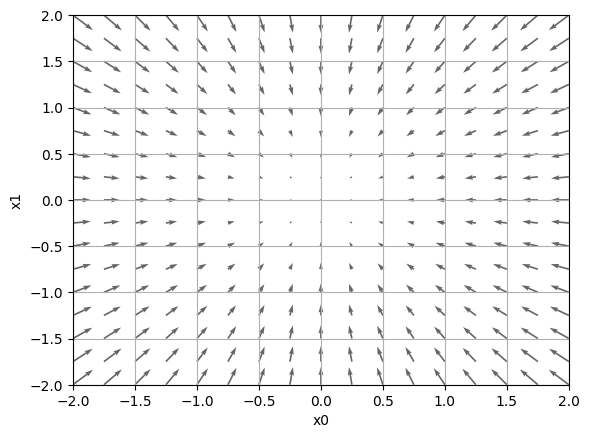

In [ ]:
  x0 = np.arange(-2, 2.5, 0.25)
  x1 = np.arange(-2, 2.5, 0.25)
  X, Y = np.meshgrid(x0, x1)

  X = X.flatten()
  Y = Y.flatten()

  grad = numerical_gradient(function_eg, np.array([X, Y]))

  plt.figure()
  plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666") #,headwidth=10,scale=40,color="#444444")
  plt.xlim([-2, 2])
  plt.ylim([-2, 2])
  plt.xlabel('x0')
  plt.ylabel('x1')
  plt.grid()
  # plt.legend()
  plt.draw()
  plt.show()

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  x_history = []

  for i in range(step_num):
    x_history.append(x.copy())

    # 'ppp' exercise
    x = x - lr * numerical_gradient(f, x)

  return x, np.array(x_history)

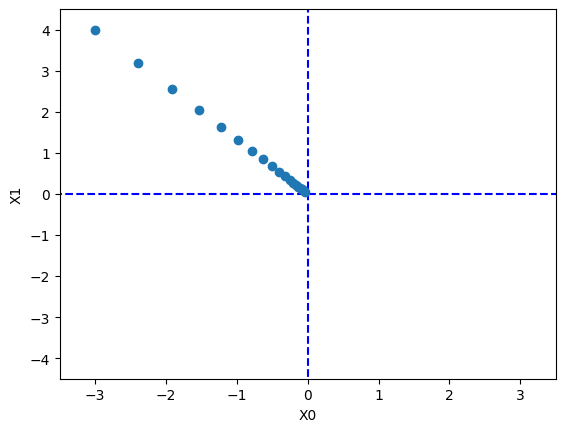

In [ ]:
def function_eg(x):
  return x[0] ** 2 + x[1] ** 2

init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_eg, init_x, lr=lr, step_num=step_num)

plt.plot([-5, 5], [0,0], '--b')
plt.plot([0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

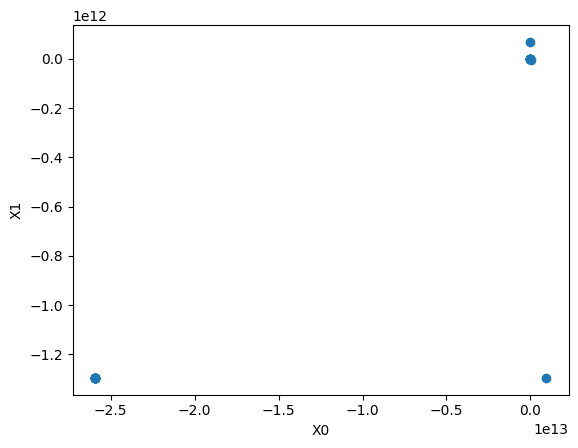

In [ ]:
init_x = np.array([-3.0, 4.0])

lr = 10.0
step_num = 20
x, x_history = gradient_descent(function_eg, init_x, lr=lr, step_num=step_num)

# plt.plot([-5, 5], [0,0], '--b')
# plt.plot([0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

# plt.xlim(-3.5, 3.5)
# plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

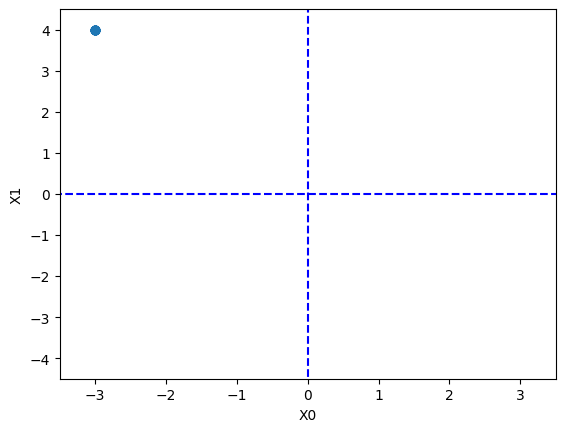

In [ ]:
init_x = np.array([-3.0, 4.0])

lr = 1e-5
step_num = 20
x, x_history = gradient_descent(function_eg, init_x, lr=lr, step_num=step_num)

plt.plot([-5, 5], [0,0], '--b')
plt.plot([0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()